# Features Engineering

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math, subprocess
import datetime as dt

https://power-calculation.com/hydroelectricity-energy-calculator.php

In [41]:
df = pd.read_csv('newhome.csv')
df.head()

C:\Users\My Computer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,Solar [kW],temperature [C],icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,windGen [kw],hydroGen [kw],Gen [kw]
0,01/01/2016 05:00,0.003483,2.3,clear-night,0.62,10.0,Clear,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,0.117504,0.0,0.120987
1,01/01/2016 05:00,0.003467,2.3,clear-night,0.62,10.0,Clear,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,0.117504,0.0,0.120971
2,01/01/2016 05:00,0.003467,2.3,clear-night,0.62,10.0,Clear,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,0.117504,0.0,0.120971
3,01/01/2016 05:00,0.003483,2.3,clear-night,0.62,10.0,Clear,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,0.117504,0.0,0.120987
4,01/01/2016 05:00,0.003467,2.3,clear-night,0.62,10.0,Clear,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,0.117504,0.0,0.120971


In [42]:
df['time'] = pd.to_datetime(df['time'])

In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Solar [kW],503909.0,0.076229,0.128427,0.000000,0.003367,0.004283,0.083917,0.613883
temperature [C],503909.0,10.412179,10.618791,-24.800000,2.094444,10.177778,19.033333,34.288889
humidity,503909.0,0.664085,0.194389,0.130000,0.510000,0.680000,0.840000,0.980000
visibility,503909.0,9.253443,1.611188,0.270000,9.420000,10.000000,10.000000,10.000000
pressure,503909.0,1016.301637,7.895188,986.400000,1011.290000,1016.530000,1021.480000,1042.460000
windSpeed,503909.0,6.649928,3.982716,0.000000,3.660000,5.930000,8.940000,22.910000
windBearing,503909.0,202.356533,106.520351,0.000000,148.000000,208.000000,295.000000,359.000000
precipIntensity,503909.0,0.002598,0.011257,0.000000,0.000000,0.000000,0.000000,0.191000
dewPoint,503909.0,38.693993,19.087953,-27.240000,24.600000,39.030000,54.790000,75.490000
precipProbability,503909.0,0.056453,0.165836,0.000000,0.000000,0.000000,0.000000,0.840000


# Heat map correlation

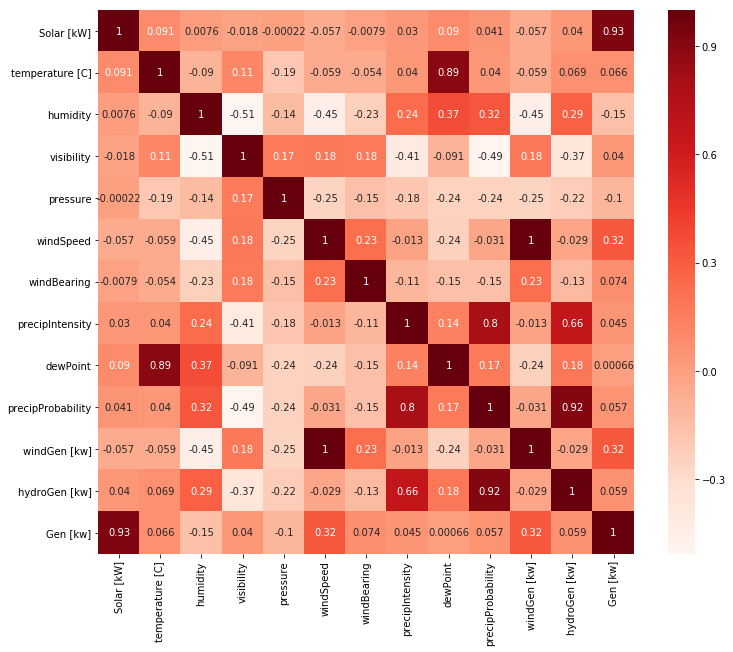

In [44]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [45]:
#Correlation with output variable
cor_target = abs(cor['Solar [kW]'])
#Selecting correlated features > 0.5
relevant_features = cor_target[cor_target>0.5]
relevant_features

Solar [kW]    1.000000
Gen [kw]      0.926739
Name: Solar [kW], dtype: float64

In [46]:
#Correlation with output variable
cor_target = abs(cor['Gen [kw]'])
#Selecting correlated features > 0.5
relevant_features = cor_target[cor_target>0.5]
relevant_features

Solar [kW]    0.926739
Gen [kw]      1.000000
Name: Gen [kw], dtype: float64

In [47]:
#Correlation with output variable
cor_target = abs(cor['windGen [kw]'])
#Selecting correlated features > 0.5
relevant_features = cor_target[cor_target>0.5]
relevant_features

windSpeed       1.0
windGen [kw]    1.0
Name: windGen [kw], dtype: float64

In [48]:
#Correlation with output variable
cor_target = abs(cor['hydroGen [kw]'])
#Selecting correlated features > 0.5
relevant_features = cor_target[cor_target>0.5]
relevant_features

precipIntensity      0.661006
precipProbability    0.916079
hydroGen [kw]        1.000000
Name: hydroGen [kw], dtype: float64

# Converting features to binary:

In [49]:
df = pd.get_dummies(data=df,
                    columns=['icon', 'summary'],
                    prefix=['icon', 'summary'])
df.head()

,time,Solar [kW],temperature [C],humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,...,summary_Foggy,summary_Heavy Snow,summary_Light Rain,summary_Light Snow,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Rain,summary_Rain and Breezy,summary_Snow
0,2016-01-01 05:00:00,0.003483,2.3,0.62,10.0,1016.91,9.18,cloudCover,282,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-01 05:00:00,0.003467,2.3,0.62,10.0,1016.91,9.18,cloudCover,282,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-01 05:00:00,0.003467,2.3,0.62,10.0,1016.91,9.18,cloudCover,282,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-01 05:00:00,0.003483,2.3,0.62,10.0,1016.91,9.18,cloudCover,282,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01 05:00:00,0.003467,2.3,0.62,10.0,1016.91,9.18,cloudCover,282,0.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#df.to_csv('home_train_test.csv')